In [15]:
!pip install mediapipe

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import mediapipe as mp

In [25]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    #read frame
    ret, frame=cap.read()
    cv2.imshow('OpenCV Feed',frame)
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [27]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [29]:

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [31]:
import mediapipe as mp

# Access submodules
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh  

def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,  # ✅ correct face connections
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1)
        )
    
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS
        )

    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS
        )
        
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS
        )

In [33]:

cap=cv2.VideoCapture(0)
#setup mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): 
    #read frame
        ret, frame=cap.read()
    #make detection
        image,results=mediapipe_detection(frame,holistic)
       
        print(results)

        #draw landmarks
        draw_landmarks(image,results)

        #show to screen
        cv2.imshow('OpenCV Feed',image)
        #break gracefully
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [34]:
draw_landmarks(frame,results)

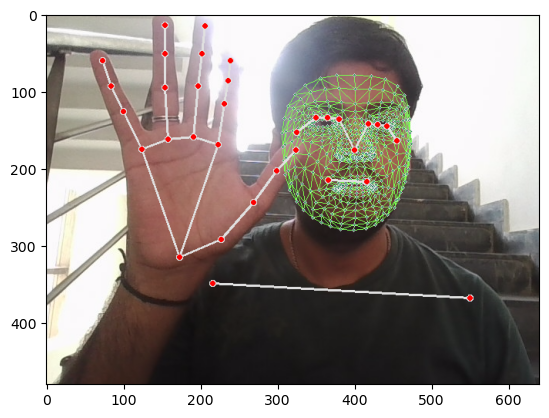

In [37]:

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [39]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [41]:
frame

array([[[143, 151, 161],
        [142, 150, 159],
        [141, 150, 158],
        ...,
        [243, 250, 243],
        [242, 249, 242],
        [241, 248, 241]],

       [[157, 165, 174],
        [155, 163, 172],
        [153, 162, 170],
        ...,
        [243, 250, 243],
        [243, 250, 243],
        [243, 250, 243]],

       [[164, 173, 181],
        [161, 170, 178],
        [159, 168, 175],
        ...,
        [242, 249, 242],
        [243, 250, 243],
        [244, 251, 244]],

       ...,

       [[220, 244, 247],
        [220, 244, 247],
        [219, 242, 244],
        ...,
        [ 41,  42,  43],
        [ 42,  43,  44],
        [ 40,  41,  42]],

       [[218, 242, 245],
        [219, 243, 246],
        [219, 243, 245],
        ...,
        [ 40,  40,  43],
        [ 43,  43,  46],
        [ 40,  40,  43]],

       [[219, 243, 246],
        [220, 244, 247],
        [220, 244, 246],
        ...,
        [ 41,  41,  44],
        [ 44,  44,  47],
        [ 40,  40,  43]]

In [43]:
draw_landmarks(frame,results)

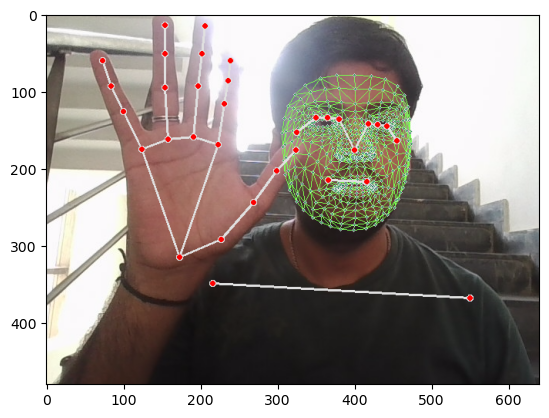

In [45]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [47]:
results.pose_landmarks

landmark {
  x: 0.6251556277275085
  y: 0.3667507469654083
  z: -1.1048858165740967
  visibility: 0.999897837638855
}
landmark {
  x: 0.6544991731643677
  y: 0.29616159200668335
  z: -1.058142900466919
  visibility: 0.9997615218162537
}
landmark {
  x: 0.673230767250061
  y: 0.2999357581138611
  z: -1.0582361221313477
  visibility: 0.9997638463973999
}
landmark {
  x: 0.6909873485565186
  y: 0.3035273849964142
  z: -1.0585755109786987
  visibility: 0.9997215270996094
}
landmark {
  x: 0.5949463844299316
  y: 0.28464603424072266
  z: -1.071768045425415
  visibility: 0.9997783303260803
}
landmark {
  x: 0.5707942247390747
  y: 0.28118687868118286
  z: -1.0708768367767334
  visibility: 0.9998154640197754
}
landmark {
  x: 0.5475950241088867
  y: 0.28006765246391296
  z: -1.071250319480896
  visibility: 0.9998078346252441
}
landmark {
  x: 0.7116187810897827
  y: 0.3419835865497589
  z: -0.5433245301246643
  visibility: 0.9996873736381531
}
landmark {
  x: 0.5082272887229919
  y: 0.3196922

In [49]:
all_landmarks=[]
for res in results.pose_landmarks.landmark:
    test =np.array([res.x,res.y,res.z,res.visibility])
    all_landmarks.append(test)

In [51]:
all_landmarks

[array([ 0.62515563,  0.36675075, -1.10488582,  0.99989784]),
 array([ 0.65449917,  0.29616159, -1.0581429 ,  0.99976152]),
 array([ 0.67323077,  0.29993576, -1.05823612,  0.99976385]),
 array([ 0.69098735,  0.30352738, -1.05857551,  0.99972153]),
 array([ 0.59494638,  0.28464603, -1.07176805,  0.99977833]),
 array([ 0.57079422,  0.28118688, -1.07087684,  0.99981546]),
 array([ 0.54759502,  0.28006765, -1.07125032,  0.99980783]),
 array([ 0.71161878,  0.34198359, -0.54332453,  0.99968737]),
 array([ 0.50822729,  0.31969222, -0.51831675,  0.99985504]),
 array([ 0.65112728,  0.45375058, -0.92286789,  0.99988556]),
 array([ 0.57261378,  0.44847977, -0.95564461,  0.99991006]),
 array([ 0.85976923,  0.768722  , -0.23976815,  0.99724716]),
 array([ 0.33804068,  0.72758049, -0.38898259,  0.9989295 ]),
 array([ 0.99989939,  1.29510713, -0.08628012,  0.16031416]),
 array([ 0.0585568 ,  1.22732961, -1.1646595 ,  0.51089895]),
 array([ 1.01984251,  1.68264556, -0.17665803,  0.05742038]),
 array([

In [53]:
len(all_landmarks)

33

In [55]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [57]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [59]:
pose

array([ 6.25155628e-01,  3.66750747e-01, -1.10488582e+00,  9.99897838e-01,
        6.54499173e-01,  2.96161592e-01, -1.05814290e+00,  9.99761522e-01,
        6.73230767e-01,  2.99935758e-01, -1.05823612e+00,  9.99763846e-01,
        6.90987349e-01,  3.03527385e-01, -1.05857551e+00,  9.99721527e-01,
        5.94946384e-01,  2.84646034e-01, -1.07176805e+00,  9.99778330e-01,
        5.70794225e-01,  2.81186879e-01, -1.07087684e+00,  9.99815464e-01,
        5.47595024e-01,  2.80067652e-01, -1.07125032e+00,  9.99807835e-01,
        7.11618781e-01,  3.41983587e-01, -5.43324530e-01,  9.99687374e-01,
        5.08227289e-01,  3.19692224e-01, -5.18316746e-01,  9.99855042e-01,
        6.51127279e-01,  4.53750581e-01, -9.22867894e-01,  9.99885559e-01,
        5.72613776e-01,  4.48479772e-01, -9.55644608e-01,  9.99910057e-01,
        8.59769225e-01,  7.68721998e-01, -2.39768147e-01,  9.97247159e-01,
        3.38040680e-01,  7.27580488e-01, -3.88982594e-01,  9.98929501e-01,
        9.99899387e-01,  

In [61]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [63]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten if results.left_hand_landmarks else np.zeros(21*3)

In [65]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [67]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
  pose

array([ 6.25155628e-01,  3.66750747e-01, -1.10488582e+00,  9.99897838e-01,
        6.54499173e-01,  2.96161592e-01, -1.05814290e+00,  9.99761522e-01,
        6.73230767e-01,  2.99935758e-01, -1.05823612e+00,  9.99763846e-01,
        6.90987349e-01,  3.03527385e-01, -1.05857551e+00,  9.99721527e-01,
        5.94946384e-01,  2.84646034e-01, -1.07176805e+00,  9.99778330e-01,
        5.70794225e-01,  2.81186879e-01, -1.07087684e+00,  9.99815464e-01,
        5.47595024e-01,  2.80067652e-01, -1.07125032e+00,  9.99807835e-01,
        7.11618781e-01,  3.41983587e-01, -5.43324530e-01,  9.99687374e-01,
        5.08227289e-01,  3.19692224e-01, -5.18316746e-01,  9.99855042e-01,
        6.51127279e-01,  4.53750581e-01, -9.22867894e-01,  9.99885559e-01,
        5.72613776e-01,  4.48479772e-01, -9.55644608e-01,  9.99910057e-01,
        8.59769225e-01,  7.68721998e-01, -2.39768147e-01,  9.97247159e-01,
        3.38040680e-01,  7.27580488e-01, -3.88982594e-01,  9.98929501e-01,
        9.99899387e-01,  

In [71]:
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [73]:
rh

array([ 2.71753877e-01,  6.58308506e-01,  4.90105208e-07,  3.55653584e-01,
        6.09251738e-01, -2.95440257e-02,  4.20997500e-01,  5.08702040e-01,
       -3.86160798e-02,  4.67589021e-01,  4.24171507e-01, -4.69847620e-02,
        5.07604480e-01,  3.68690968e-01, -5.48691526e-02,  3.49125862e-01,
        3.52638066e-01, -7.59689091e-03,  3.62246364e-01,  2.43529826e-01,
       -2.22811457e-02,  3.69677663e-01,  1.80065960e-01, -3.75691988e-02,
        3.73751402e-01,  1.25946045e-01, -5.02935722e-02,  2.98756391e-01,
        3.32127184e-01, -1.18539035e-02,  3.08322549e-01,  1.94669902e-01,
       -2.67003998e-02,  3.16829652e-01,  1.06921911e-01, -4.37024981e-02,
        3.21964711e-01,  3.19702625e-02, -5.65057546e-02,  2.47589499e-01,
        3.37511778e-01, -2.21702121e-02,  2.41648182e-01,  1.98535368e-01,
       -4.48701568e-02,  2.40941912e-01,  1.08026087e-01, -6.85846135e-02,
        2.41692603e-01,  3.05322707e-02, -8.45154151e-02,  1.94232658e-01,
        3.65574360e-01, -

In [75]:
face

array([ 0.63182974,  0.43879402, -0.04092573, ...,  0.70877182,
        0.29163817,  0.03483762])

In [77]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [79]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [81]:
result_test=extract_keypoints(results)

In [83]:
result_test

array([ 0.62515563,  0.36675075, -1.10488582, ...,  0.11556002,
        0.12665702, -0.08999845])

In [85]:
extract_keypoints(results).shape

(1662,)

In [87]:
extract_keypoints(results)[:10]

array([ 0.62515563,  0.36675075, -1.10488582,  0.99989784,  0.65449917,
        0.29616159, -1.0581429 ,  0.99976152,  0.67323077,  0.29993576])

In [89]:
np.save('0',result_test)

In [91]:
np.load('0.npy')

array([ 0.62515563,  0.36675075, -1.10488582, ...,  0.11556002,
        0.12665702, -0.08999845])

In [300]:
#path for exported data,numpy arrays
DATA_PATH=os.path.join('MP_Data10')

#actions that we try to detect
actions =np.array(['hello', 'thanks', 'i love you','I','Father','Mother','Yes','No','Help','What'])

#thirty videos
no_sequences=30

#videos are going to be 30 frames in length
sequence_length=30

In [302]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [79]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                # Check if keypoints for this frame already exist
                npy_path = os.path.join(DATA_PATH, action, str(sequence), f'{frame_num}.npy')
                if os.path.exists(npy_path):
                    continue  # Skip already collected frame

                # Make directory if it doesn’t exist
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)

                # Read frame
                ret, frame = cap.read()
                if not ret:
                    continue

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                draw_landmarks(image, results)

                # Display progress
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, f'Collecting {action} Video {sequence} Frame {frame_num}', (15, 12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # Show to screen
                cv2.imshow('OpenCV Feed', image)

                # Extract and save keypoints
                keypoints = extract_keypoints(results)
                np.save(npy_path, keypoints)

                # Exit if 'q' is pressed
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    cap.release()
                    cv2.destroyAllWindows()
                    exit()

cap.release()
cv2.destroyAllWindows()

In [304]:
import os
import numpy as np

SOURCE_DIR = 'MP_Data10'
DEST_DIR = 'MP_Data10_AUGMENTED3'
AUGMENTATIONS_PER_SAMPLE = 5
sequence_length = 30

os.makedirs(DEST_DIR, exist_ok=True)

def add_noise(keypoints):
    noise = np.random.normal(0, 0.01, keypoints.shape)
    return keypoints + noise

def scale(keypoints, factor=None):
    if factor is None:
        factor = np.random.uniform(0.9, 1.1)
    return keypoints * factor

def rotate_xyz(keypoints):
    reshaped = keypoints.reshape(-1, 3)
    theta = np.radians(np.random.uniform(-10, 10))
    c, s = np.cos(theta), np.sin(theta)
    rotation_matrix = np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])
    rotated = np.dot(reshaped, rotation_matrix.T)
    return rotated.flatten()

def temporal_jitter(keypoints):
    idx = np.random.choice(len(keypoints), size=10, replace=False)
    keypoints[idx] += np.random.normal(0, 0.01, 10)
    return keypoints

def shuffle_parts(keypoints):
    pose = keypoints[:132]
    face = keypoints[132:1536]
    lh = keypoints[1536:1599]
    rh = keypoints[1599:]
    parts = [pose, face, lh, rh]
    np.random.shuffle(parts)
    return np.concatenate(parts)

aug_funcs = [add_noise, scale, rotate_xyz, temporal_jitter, shuffle_parts]

# Process each action and sequence
for action in os.listdir(SOURCE_DIR):
    action_path = os.path.join(SOURCE_DIR, action)
    for seq in os.listdir(action_path):
        seq_path = os.path.join(action_path, seq)
        frame_files = sorted([f for f in os.listdir(seq_path) if f.endswith('.npy')],
                             key=lambda x: int(x.split('.')[0]))

        if len(frame_files) < sequence_length:
            continue  # skip incomplete sequences

        # Load all 30 frames
        original_sequence = [np.load(os.path.join(seq_path, f"{i}.npy")) for i in range(sequence_length)]

        # Save original sequence
        dest_seq_path = os.path.join(DEST_DIR, action, seq)
        os.makedirs(dest_seq_path, exist_ok=True)
        for i, frame in enumerate(original_sequence):
            np.save(os.path.join(dest_seq_path, f"{i}.npy"), frame)

        # Create augmentations
        for aug_id in range(AUGMENTATIONS_PER_SAMPLE):
            augmented_sequence = []
            selected = np.random.choice(aug_funcs, size=np.random.randint(2, 4), replace=False)

            for frame in original_sequence:
                aug_frame = frame.copy()
                for func in selected:
                    aug_frame = func(aug_frame)
                augmented_sequence.append(aug_frame)

            aug_seq_name = f"{seq}_aug{aug_id}"
            aug_seq_path = os.path.join(DEST_DIR, action, aug_seq_name)
            os.makedirs(aug_seq_path, exist_ok=True)
            for i, frame in enumerate(augmented_sequence):
                np.save(os.path.join(aug_seq_path, f"{i}.npy"), frame)

print("Augmentation complete. All sequences saved in folders.")


Augmentation complete. All sequences saved in folders.


In [242]:
import numpy as np
import os
import shutil

original_data_path = 'MP_Data8'
augmented_data_path = 'MP_Data8_AUGMENTED'
augmentations_per_sample = 5

def apply_augmentation(sequence):
    # Add your real augmentations here
    # For now, return dummy list of augmentations
    return [np.array(frame) + np.random.normal(0, 0.01, frame.shape) for frame in sequence]

actions = os.listdir(original_data_path)
for action in actions:
    original_action_path = os.path.join(original_data_path, action)
    augmented_action_path = os.path.join(augmented_data_path, action)
    os.makedirs(augmented_action_path, exist_ok=True)

    for sequence in os.listdir(original_action_path):
        src_seq_path = os.path.join(original_action_path, sequence)
        files = sorted(os.listdir(src_seq_path), key=lambda x: int(x.split('.')[0]))
        
        # Load original sequence
        original_sequence = [np.load(os.path.join(src_seq_path, file)) for file in files]

        # Save original
        dst_orig_seq_path = os.path.join(augmented_action_path, sequence)
        os.makedirs(dst_orig_seq_path, exist_ok=True)
        for i, frame in enumerate(original_sequence):
            np.save(os.path.join(dst_orig_seq_path, f"{i}.npy"), frame)

        # Save augmented versions
        for aug_id in range(augmentations_per_sample):
            aug_sequence = apply_augmentation(original_sequence)
            aug_seq_folder = f"{sequence}_aug{aug_id}"
            dst_aug_seq_path = os.path.join(augmented_action_path, aug_seq_folder)
            os.makedirs(dst_aug_seq_path, exist_ok=True)
            for i, frame in enumerate(aug_sequence):
                np.save(os.path.join(dst_aug_seq_path, f"{i}.npy"), frame)


In [306]:
cap.release()
cv2.destroyAllWindows()

In [308]:
import os
print(os.path.abspath('MP_Data10'))

C:\Users\Kartik\MP_Data10


In [310]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [312]:
!pip install tensorflow

In [314]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [316]:
label_map = {label:num for num, label in enumerate(actions)}

In [318]:
label_map

{'hello': 0,
 'thanks': 1,
 'i love you': 2,
 'I': 3,
 'Father': 4,
 'Mother': 5,
 'Yes': 6,
 'No': 7,
 'Help': 8,
 'What': 9}

In [320]:
sequences, labels = [], []

for action in actions:
    action_path = os.path.join(DEST_DIR, action)
    for sequence in sorted(os.listdir(action_path)):
        sequence_path = os.path.join(action_path, sequence)

        if not os.path.isdir(sequence_path):
            continue  # skip files

        files = sorted([f for f in os.listdir(sequence_path) if f.endswith('.npy')])

        if len(files) < sequence_length:
            continue

        window = []
        for i in range(sequence_length):
            res = np.load(os.path.join(sequence_path, f"{i}.npy"))
            window.append(res)

        sequences.append(window)
        labels.append(label_map[action])


In [322]:

np.array(sequences).shape

(1800, 30, 1662)

In [324]:
np.array(labels).shape

(1800,)

In [326]:
print("Labels collected:", len(labels))


Labels collected: 1800


In [328]:

X = np.array(sequences)

In [330]:

X.shape

(1800, 30, 1662)

In [332]:
np.array(labels).shape


(1800,)

In [334]:

X = np.array(sequences)

In [336]:

X.shape

(1800, 30, 1662)

In [338]:
y = to_categorical(labels).astype(int)

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [342]:
y_test.shape

(90, 10)

In [344]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [346]:

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [348]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class TemporalAttention(Layer):
    def __init__(self, **kwargs):
        super(TemporalAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(TemporalAttention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)  # (batch, time, 1)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)


In [141]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [350]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf

# Input
input_shape = (30, 1662)
inputs = Input(shape=input_shape)

x = LSTM(64, return_sequences=True, activation='relu')(inputs)
x = LSTM(128, return_sequences=True, activation='relu')(x)

# Temporal Attention (Assuming you have this layer defined)
attention = TemporalAttention()(x)  # Output shape: (batch, 128)

x = Dense(64, activation='relu')(attention)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(len(actions), activation='softmax')(x)

model = Model(inputs, outputs)

# Optional: Custom F1 Score Metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_labels = tf.argmax(y_pred, axis=1)
        y_true_labels = tf.argmax(y_true, axis=1)
        self.precision.update_state(y_true_labels, y_pred_labels, sample_weight)
        self.recall.update_state(y_true_labels, y_pred_labels, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Compile with extra metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), F1Score()]
)


In [354]:
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8400 - f1_score: 0.9893 - loss: 0.4000 - precision: 0.9070 - recall: 0.7859
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8553 - f1_score: 0.9928 - loss: 0.4980 - precision: 0.8905 - recall: 0.7992
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8449 - f1_score: 0.9876 - loss: 0.3460 - precision: 0.8875 - recall: 0.8142
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8645 - f1_score: 0.9938 - loss: 0.3570 - precision: 0.8857 - recall: 0.8276
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8768 - f1_score: 0.9914 - loss: 0.3016 - precision: 0.9143 - recall: 0.8402
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8833 - f1_score: 0.9957 - loss: 0.2736 - precision: 0.9075 - recall: 0.8599
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8438 - f1_score: 0.9918 - loss: 0.3694 - precision: 0.8763 - recall: 0.8194
Epoch 8/50
57

In [356]:
model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 30, 1662)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ temporal_attention_2            │ (None, 128)            │           158 │
│ (TemporalAttention)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,655,258 (6.31 MB)

 Trainable params: 551,752 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,103,506 (4.21 MB)

In [358]:
print(X_train.shape)  # Should print something like (num_samples, timesteps, features)
print(y_train.shape)  # Should print something like (num_samples, num_classes)


(1710, 30, 1662)
(1710, 10)


In [360]:

res = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step


In [362]:
actions[np.argmax(res[4])]

'Father'

In [364]:

actions[np.argmax(y_test[4])]

'Father'

In [366]:

model.save('action.h5')

In [368]:

model.load_weights('action.h5')

In [370]:

yhat = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [372]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [374]:
from sklearn.metrics import multilabel_confusion_matrix


In [376]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[85,  0],
        [ 0,  5]],

       [[82,  0],
        [ 0,  8]],

       [[82,  0],
        [ 0,  8]],

       [[82,  0],
        [ 0,  8]],

       [[81,  0],
        [ 0,  9]],

       [[79,  0],
        [ 0, 11]],

       [[84,  1],
        [ 0,  5]],

       [[73,  0],
        [ 1, 16]],

       [[83,  0],
        [ 0,  7]],

       [[78,  0],
        [ 0, 12]]], dtype=int64)

In [378]:

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [396]:
accuracy_score(ytrue, yhat)


0.9888888888888889

In [189]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    # Ensure res is a 1D list of floats
    res = np.array(res).flatten()

    # Limit loop to the smallest available length
    length = min(len(res), len(actions), len(colors))

    for num in range(length):
        prob = float(res[num])  # Convert to scalar float
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame

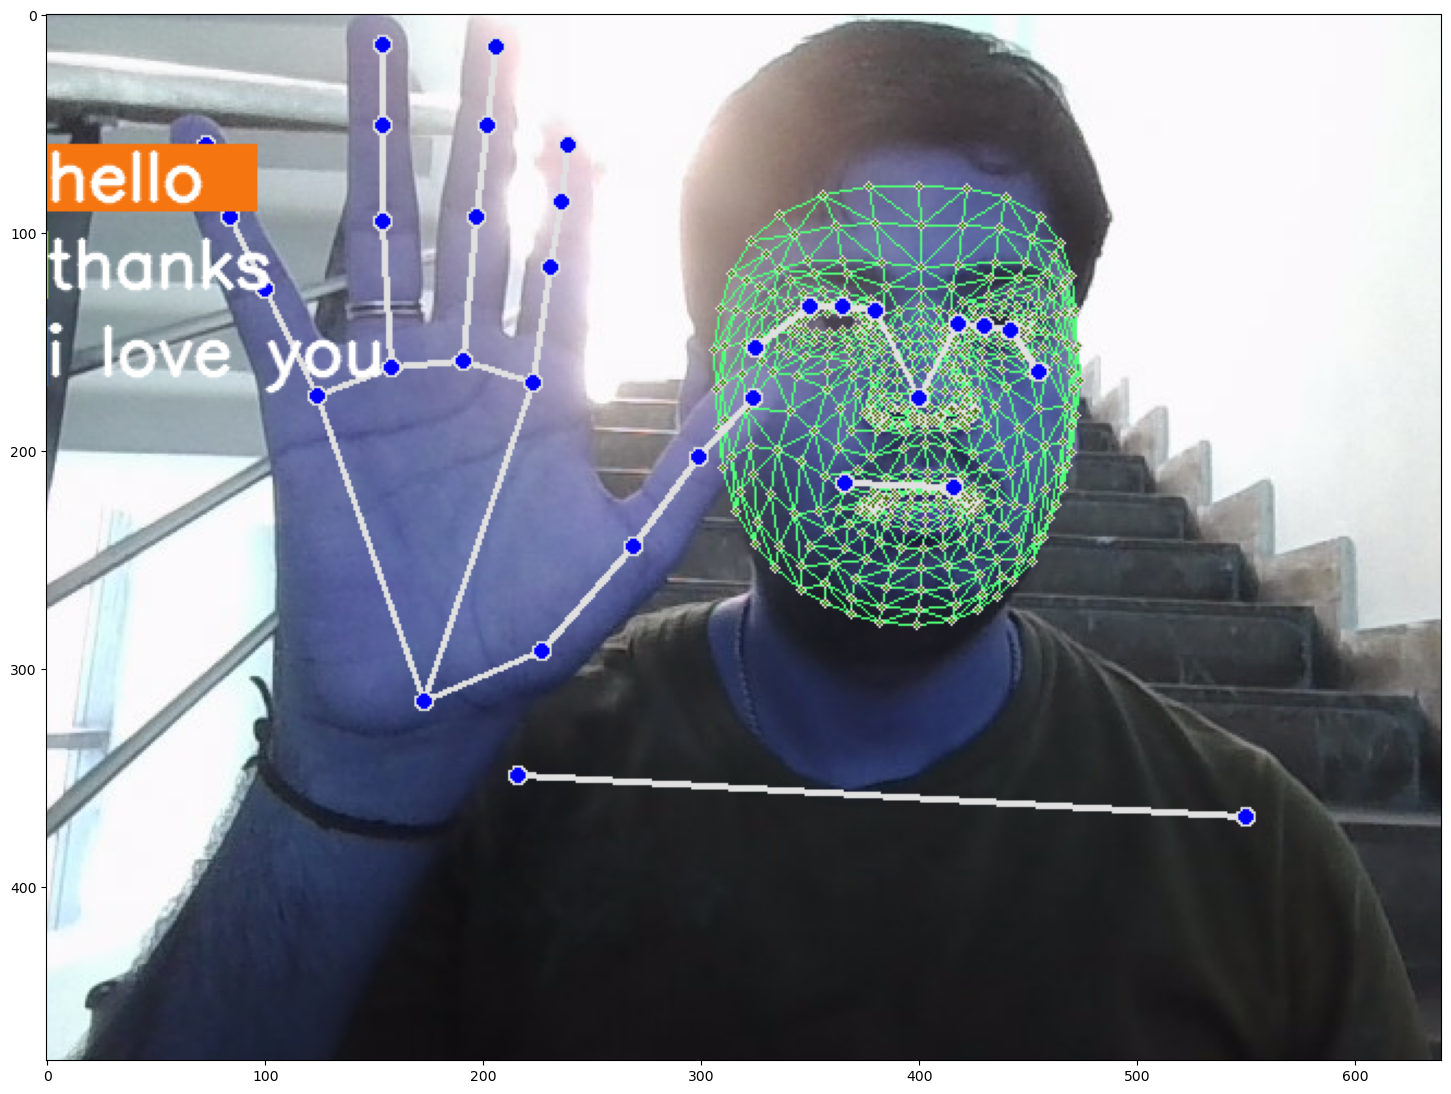

In [191]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [398]:
import time
from collections import Counter

sequence = []
sentence = []
predictions = []
threshold = 0.6
cooldown_frames = 20
last_detected_frame = 0

cap = cv2.VideoCapture(0)

# Timing for FPS
prev_frame_time = 0
new_frame_time = 0

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Time for FPS calculation
        new_frame_time = time.time()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        draw_landmarks(image, results)

        # Extract keypoints
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        display_text = ""
        confidence = 0

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_class = np.argmax(res)
            confidence = res[predicted_class]
            predictions.append(predicted_class)

            # Smoothing
            if len(predictions) > 10:
                predictions = predictions[-10:]
            most_common_pred = Counter(predictions).most_common(1)[0][0]

            if confidence > threshold and most_common_pred == predicted_class:
                if frame_count - last_detected_frame > cooldown_frames:
                    word = actions[predicted_class]
                    if len(sentence) == 0 or word != sentence[-1]:
                        sentence.append(word)
                        last_detected_frame = frame_count

            # Top-3 predictions (optional visualization)
            top3_idx = np.argsort(res)[-3:][::-1]
            top3_words = [(actions[i], res[i]) for i in top3_idx]

            display_text = f"{actions[predicted_class]} ({confidence:.2f})"

        # Trim sentence
        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Draw probability bars
        if len(sequence) == 30:
            image = prob_viz(res, actions, image, colors)

        # Draw sentence
        cv2.rectangle(image, (0, 0), (800, 80), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (10, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 3, cv2.LINE_AA)

        # Show predicted word + confidence
        if display_text:
            cv2.putText(image, f"Prediction: {display_text}", (10, 100),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

        # Calculate and show FPS
        fps = 1 / (new_frame_time - prev_frame_time + 1e-6)
        prev_frame_time = new_frame_time
        cv2.putText(image, f"FPS: {int(fps)}", (500, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Exit on 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━